<a href="https://colab.research.google.com/github/lee-jaewook/2021_ai_project_house_price_prediction/blob/main/Previous_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망을 이용한 주택가격지수 예측

## In Colab

In [64]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/AI 2021")

In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import tensorflow as tf
import pydot
import graphviz 
from numpy import unique
from numpy import argmax
import math
from imblearn.over_sampling import SMOTE

In [67]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI 2021/Dataset/house_dataset(micro_macro).csv")

In [68]:
for i in range(df.shape[0]):
    df["Date"][i]=df["Date"][i][0:4]+df["Date"][i][6:-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
X = np.array(df.iloc[:,1:-1])
y = np.array(df.iloc[:,-1])

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

### Train : 0~143( ~ 2018)
### test : 144~ (2019 ~)

In [71]:
X.shape

(168, 12)

In [72]:
X_micro_train=X[:144,:6]
X_micro_test=X[144:,:6]
X_macro_train=X[:144,6:]
X_macro_test=X[144:,6:]

y_train = y[:144]
y_test = y[144:]

In [73]:
X_macro_train.shape

(144, 6)

# Macro data (CASE 1)
---

In [116]:
n_features = X_macro_train.shape[1]

# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_macro_train, y_train, epochs=1000, batch_size=32, verbose=2)

# evaluate on test set
preds = model.predict(X_macro_test)

preds1=np.reshape(preds,(preds.shape[0],))

case1 = np.concatenate((y_train,preds1),axis=0)

tf.keras.backend.clear_session()

Epoch 1/1000
5/5 - 0s - loss: 6906.2305
Epoch 2/1000
5/5 - 0s - loss: 6594.6865
Epoch 3/1000
5/5 - 0s - loss: 6277.0391
Epoch 4/1000
5/5 - 0s - loss: 5955.1572
Epoch 5/1000
5/5 - 0s - loss: 5614.5498
Epoch 6/1000
5/5 - 0s - loss: 5256.2090
Epoch 7/1000
5/5 - 0s - loss: 4867.1348
Epoch 8/1000
5/5 - 0s - loss: 4465.3613
Epoch 9/1000
5/5 - 0s - loss: 4047.8281
Epoch 10/1000
5/5 - 0s - loss: 3618.0259
Epoch 11/1000
5/5 - 0s - loss: 3199.0815
Epoch 12/1000
5/5 - 0s - loss: 2787.1140
Epoch 13/1000
5/5 - 0s - loss: 2412.1709
Epoch 14/1000
5/5 - 0s - loss: 2071.2991
Epoch 15/1000
5/5 - 0s - loss: 1768.9517
Epoch 16/1000
5/5 - 0s - loss: 1515.6239
Epoch 17/1000
5/5 - 0s - loss: 1307.2476
Epoch 18/1000
5/5 - 0s - loss: 1144.5746
Epoch 19/1000
5/5 - 0s - loss: 1015.0803
Epoch 20/1000
5/5 - 0s - loss: 918.0336
Epoch 21/1000
5/5 - 0s - loss: 840.3181
Epoch 22/1000
5/5 - 0s - loss: 773.1760
Epoch 23/1000
5/5 - 0s - loss: 713.8276
Epoch 24/1000
5/5 - 0s - loss: 665.5223
Epoch 25/1000
5/5 - 0s - loss:

# Micro data (CASE 2)
---

In [117]:
n_features = X_micro_train.shape[1]

# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_micro_train, y_train, epochs=1000, batch_size=32,verbose=2)

# evaluate on test set
preds = model.predict(X_micro_test)

preds2=np.reshape(preds,(preds.shape[0],))

case2 = np.concatenate((y_train,preds2),axis=0)

tf.keras.backend.clear_session()

Epoch 1/1000
5/5 - 0s - loss: 7041.4521
Epoch 2/1000
5/5 - 0s - loss: 6758.5103
Epoch 3/1000
5/5 - 0s - loss: 6480.3047
Epoch 4/1000
5/5 - 0s - loss: 6199.6470
Epoch 5/1000
5/5 - 0s - loss: 5902.9326
Epoch 6/1000
5/5 - 0s - loss: 5583.0176
Epoch 7/1000
5/5 - 0s - loss: 5239.6748
Epoch 8/1000
5/5 - 0s - loss: 4880.4351
Epoch 9/1000
5/5 - 0s - loss: 4498.8022
Epoch 10/1000
5/5 - 0s - loss: 4107.1055
Epoch 11/1000
5/5 - 0s - loss: 3706.4392
Epoch 12/1000
5/5 - 0s - loss: 3312.1272
Epoch 13/1000
5/5 - 0s - loss: 2920.5898
Epoch 14/1000
5/5 - 0s - loss: 2555.7056
Epoch 15/1000
5/5 - 0s - loss: 2223.4653
Epoch 16/1000
5/5 - 0s - loss: 1925.0825
Epoch 17/1000
5/5 - 0s - loss: 1656.0999
Epoch 18/1000
5/5 - 0s - loss: 1427.6320
Epoch 19/1000
5/5 - 0s - loss: 1221.9297
Epoch 20/1000
5/5 - 0s - loss: 1056.6761
Epoch 21/1000
5/5 - 0s - loss: 915.0433
Epoch 22/1000
5/5 - 0s - loss: 802.8929
Epoch 23/1000
5/5 - 0s - loss: 721.1326
Epoch 24/1000
5/5 - 0s - loss: 652.9895
Epoch 25/1000
5/5 - 0s - loss

# All data (CASE 3)
---

In [118]:
X_train=X[:144,]
X_test=X[144:,]
n_features = X_train.shape[1]
# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=2)

# evaluate on test set
preds = model.predict(X_test)
preds3=np.reshape(preds,(preds.shape[0],))

case3 = np.concatenate((y_train,preds3),axis=0)

tf.keras.backend.clear_session()

Epoch 1/1000
5/5 - 0s - loss: 6922.8394
Epoch 2/1000
5/5 - 0s - loss: 6580.3872
Epoch 3/1000
5/5 - 0s - loss: 6240.3135
Epoch 4/1000
5/5 - 0s - loss: 5886.0693
Epoch 5/1000
5/5 - 0s - loss: 5524.5947
Epoch 6/1000
5/5 - 0s - loss: 5137.2993
Epoch 7/1000
5/5 - 0s - loss: 4732.0693
Epoch 8/1000
5/5 - 0s - loss: 4304.7314
Epoch 9/1000
5/5 - 0s - loss: 3872.7288
Epoch 10/1000
5/5 - 0s - loss: 3442.5459
Epoch 11/1000
5/5 - 0s - loss: 3017.8306
Epoch 12/1000
5/5 - 0s - loss: 2621.0754
Epoch 13/1000
5/5 - 0s - loss: 2246.7830
Epoch 14/1000
5/5 - 0s - loss: 1923.6333
Epoch 15/1000
5/5 - 0s - loss: 1630.4659
Epoch 16/1000
5/5 - 0s - loss: 1386.1571
Epoch 17/1000
5/5 - 0s - loss: 1168.6453
Epoch 18/1000
5/5 - 0s - loss: 968.4474
Epoch 19/1000
5/5 - 0s - loss: 820.2784
Epoch 20/1000
5/5 - 0s - loss: 689.3262
Epoch 21/1000
5/5 - 0s - loss: 590.9487
Epoch 22/1000
5/5 - 0s - loss: 518.4355
Epoch 23/1000
5/5 - 0s - loss: 466.8770
Epoch 24/1000
5/5 - 0s - loss: 433.1581
Epoch 25/1000
5/5 - 0s - loss: 4

# matplot graph

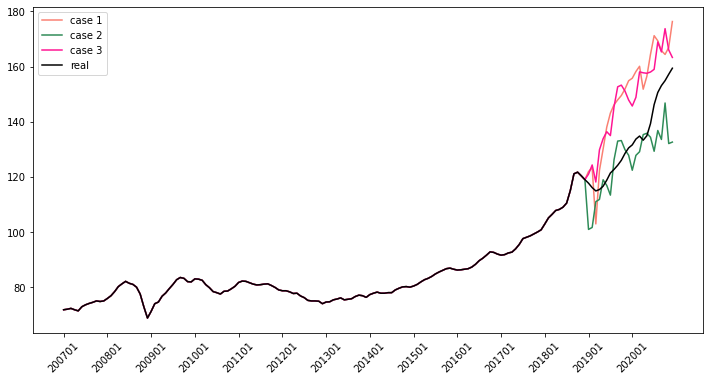

In [119]:
plt.figure(figsize=(12, 6))
x_date = df.iloc[:,0]
plt.plot(x_date,case1, color="salmon")
plt.plot(x_date,case2, color="seagreen")
plt.plot(x_date,case3, color="deeppink")
plt.plot(x_date,y, color="black")
plt.legend(['case 1','case 2','case 3', 'real'])
plt.xticks(ticks=x_date, rotation=45)
plt.locator_params(axis='x', nbins=x_date.shape[0]/12)
plt.show()

In [120]:
arr=[mean_squared_error(y_test,preds1), mean_squared_error(y_test,preds2), mean_squared_error(y_test,preds3)]
result=pd.DataFrame(arr).transpose()

In [121]:
result

,0,1,2
0,373.361481,133.114484,312.366781


In [122]:
import os
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/AI 2021/result_baseline.csv'):
    result.to_csv('/content/drive/MyDrive/Colab Notebooks/AI 2021/result_baseline.csv', index=False, mode='w', encoding='utf-8-sig')
else:
    result.to_csv('/content/drive/MyDrive/Colab Notebooks/AI 2021/result_baseline.csv', index=False, mode='a', encoding='utf-8-sig', header=False)